In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olympic-games-medals-19862018/olympic_hosts.csv
/kaggle/input/olympic-games-medals-19862018/olympic_medals.csv
/kaggle/input/olympic-games-medals-19862018/olympic_results.csv
/kaggle/input/olympic-games-medals-19862018/olympic_athletes.csv
/kaggle/input/olympic-games-medals-19862018/olympic_results.pkl


## How is data look like?

In [2]:
data_hosts_path = '/kaggle/input/olympic-games-medals-19862018/olympic_hosts.csv'
data_medals_path = '/kaggle/input/olympic-games-medals-19862018/olympic_medals.csv'
data_results_path = '/kaggle/input/olympic-games-medals-19862018/olympic_results.csv'
data_athletes_path = '/kaggle/input/olympic-games-medals-19862018/olympic_athletes.csv'

### Hosts Dataset

In [3]:
df_hosts = pd.read_csv(data_hosts_path)
df_hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [4]:
df_hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


### Medals Dataset

In [5]:
df_medals = pd.read_csv(data_medals_path)
df_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [6]:
df_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


### Results Dataset

In [7]:
df_results = pd.read_csv(data_results_path)
df_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [8]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

### Athletes Dataset

In [9]:
df_athletes = pd.read_csv(data_athletes_path)
df_athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [10]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


## Join tables (example: medals)

In [11]:
data = df_medals.merge(df_hosts, how='left', left_on='slug_game', right_on='game_slug')
data['athlete_full_name'] = data['athlete_full_name'].str.title()
# removes join columns
data.drop(['slug_game', 'game_slug'], inplace=True, axis=1)
# removes unused columns
data.drop(['game_end_date', 'game_start_date'], axis=1, inplace=True)
data.shape

(21697, 15)

In [12]:
data.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania Constantini,Italy,IT,ITA,China,Beijing 2022,Winter,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos Mosaner,Italy,IT,ITA,China,Beijing 2022,Winter,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin Skaslien,Norway,NO,NOR,China,Beijing 2022,Winter,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus Nedregotten,Norway,NO,NOR,China,Beijing 2022,Winter,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida De Val,Sweden,SE,SWE,China,Beijing 2022,Winter,2022


In [13]:
# replaces long country names with short analogs
country_dict = {
    'German Democratic Republic (Germany)':'Germany', 
    'Federal Republic of Germany':'Germany',
    "Democratic People's Republic of Korea":'North Korea',
    "Republic of Korea":"South Korea",
    "People's Republic of China":'China',
    "Islamic Republic of Iran":'Iran',
    "United States of America":'USA'}
data['country_name'] = data['country_name'].replace(country_dict)

In [14]:
# replaces changed disciplines names
discipline_map={
    "Gymnastics Artistic":"Artistic Gymnastics",
    "Gymnastics Rhythmic":"Rhythmic Gymnastics",
    "Synchronized Swimming":"Artistic Swimming",
    "Equestrian Dressage":"Equestrian",
    "Equestrian Jumping":"Equestrian",
    "Equestrian Eventing":"Equestrian",
    "Trampoline":"Trampoline Gymnastics",
    "Cycling BMX":"Cycling BMX Racing",
    "Short Track Speed Skating": "Short Track"
}
data['discipline_title'] = data['discipline_title'].replace(discipline_map)

## Dataset Preprocessing (example: medals)


The dataset contains two different rows for both winners in a team competition that consists of two persons, but it is one medal in total. For example, you can check the Tennis Doubles Men competition. Let's split the dataset into parts, group those team competitions, and join data again.

In [15]:
data_athlete = data[data['participant_type']=='Athlete']
data_athlete.shape

(15113, 15)

In [16]:
data_team = data[data['participant_type']=='GameTeam']
data_team.shape

(6584, 15)

In [17]:
data_team_a = data_team[data_team['athlete_full_name'].isna()]
data_team_a.shape

(3624, 15)

In [18]:
group_columns = ['discipline_title', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title',
                 'country_name', 'country_3_letter_code', 'game_location', 'game_season', 'game_name', 'game_year']
agg_columns = ['country_code', 'athlete_full_name']
data_team_b = data_team[data_team['athlete_full_name'].notna()].groupby(group_columns)[agg_columns]\
                                                               .agg(lambda x: set(x)).reset_index()
data_team_b['country_code'] = data_team_b['country_code'].apply(lambda x: list(x)[0])
data_team_b['athlete_full_name'] = data_team_b['athlete_full_name'].apply(lambda x: list(x))
data_team_b.shape

(1480, 14)

In [19]:
data_medal = pd.concat([data_team_a, data_team_b, data_athlete], axis=0).reset_index(drop=True)
data_medal.shape

(20217, 15)

In [20]:
# fix some disciplines and events
data_medal.loc[data_medal['event_title']=='Baseball', 'discipline_title'] = 'Baseball'
data_medal.loc[data_medal['event_title']=='Softball', 'discipline_title'] = 'Softball'
data_medal.loc[data_medal['event_title']=='Baseball', 'event_title'] = 'baseball men'
data_medal.loc[data_medal['event_title']=='Softball', 'event_title'] = 'softball women'

data_medal.loc[data_medal['event_title']=='rugby-7 men', 'discipline_title'] = 'Rugby Sevens'
data_medal.loc[data_medal['event_title']=='rugby-7 women', 'discipline_title'] = 'Rugby Sevens'
data_medal.loc[data_medal['event_title']=='rugby-7 men', 'event_title'] = 'Men'
data_medal.loc[data_medal['event_title']=='rugby-7 women', 'event_title'] = 'Women'

## Timeline of disciplines contested at the Summer Olympic Games, 1986-2020

In [21]:
def get_disciplines_game(df, season):
    '''
    '''
    df = df[df['game_season']==season].reset_index(drop=True).copy()
    df_disciplines_year = df.groupby(['discipline_title', 'game_year'])['participant_type']\
                            .count().reset_index()
    df_heatmap = df_disciplines_year.pivot('discipline_title', 'game_year', 'participant_type')
    df_heatmap[df_heatmap > 0] = 1
    column_list = list(df_heatmap.columns)
    column_last = column_list[-1]

    disciplines_current = df_heatmap[df_heatmap[column_last]==1].sort_values(column_list)
    disciplines_current_not = df_heatmap[df_heatmap[column_last]!=1].sort_values(column_list)
    df_heatmap = pd.concat([disciplines_current, disciplines_current_not])  
    df_heatmap.columns = [str(col)[:-2]+'\n'+str(col)[-2:] for col in column_list]
    df_heatmap.index = [idx.replace(' ', '\n', 1) for idx in df_heatmap.index]
    return df_heatmap

In [22]:
def plot_disciplines(data, title, size=(16,16)):
    '''
    Return plot
    '''
    plt.figure(figsize=size)
    ax = sns.heatmap(data, annot=False, cbar=False, 
                     linewidths=0.8, linecolor='black', 
                     square=True, cmap='Spectral')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none') 
    ax.spines[['bottom', 'right']].set_visible(True)
    ax.set_title('{} Games'.format(title), size=22)
    plt.tight_layout()
#     plt.savefig('heatmap_{}_games.png'.format(title.lower()), dpi=200)
    plt.show()

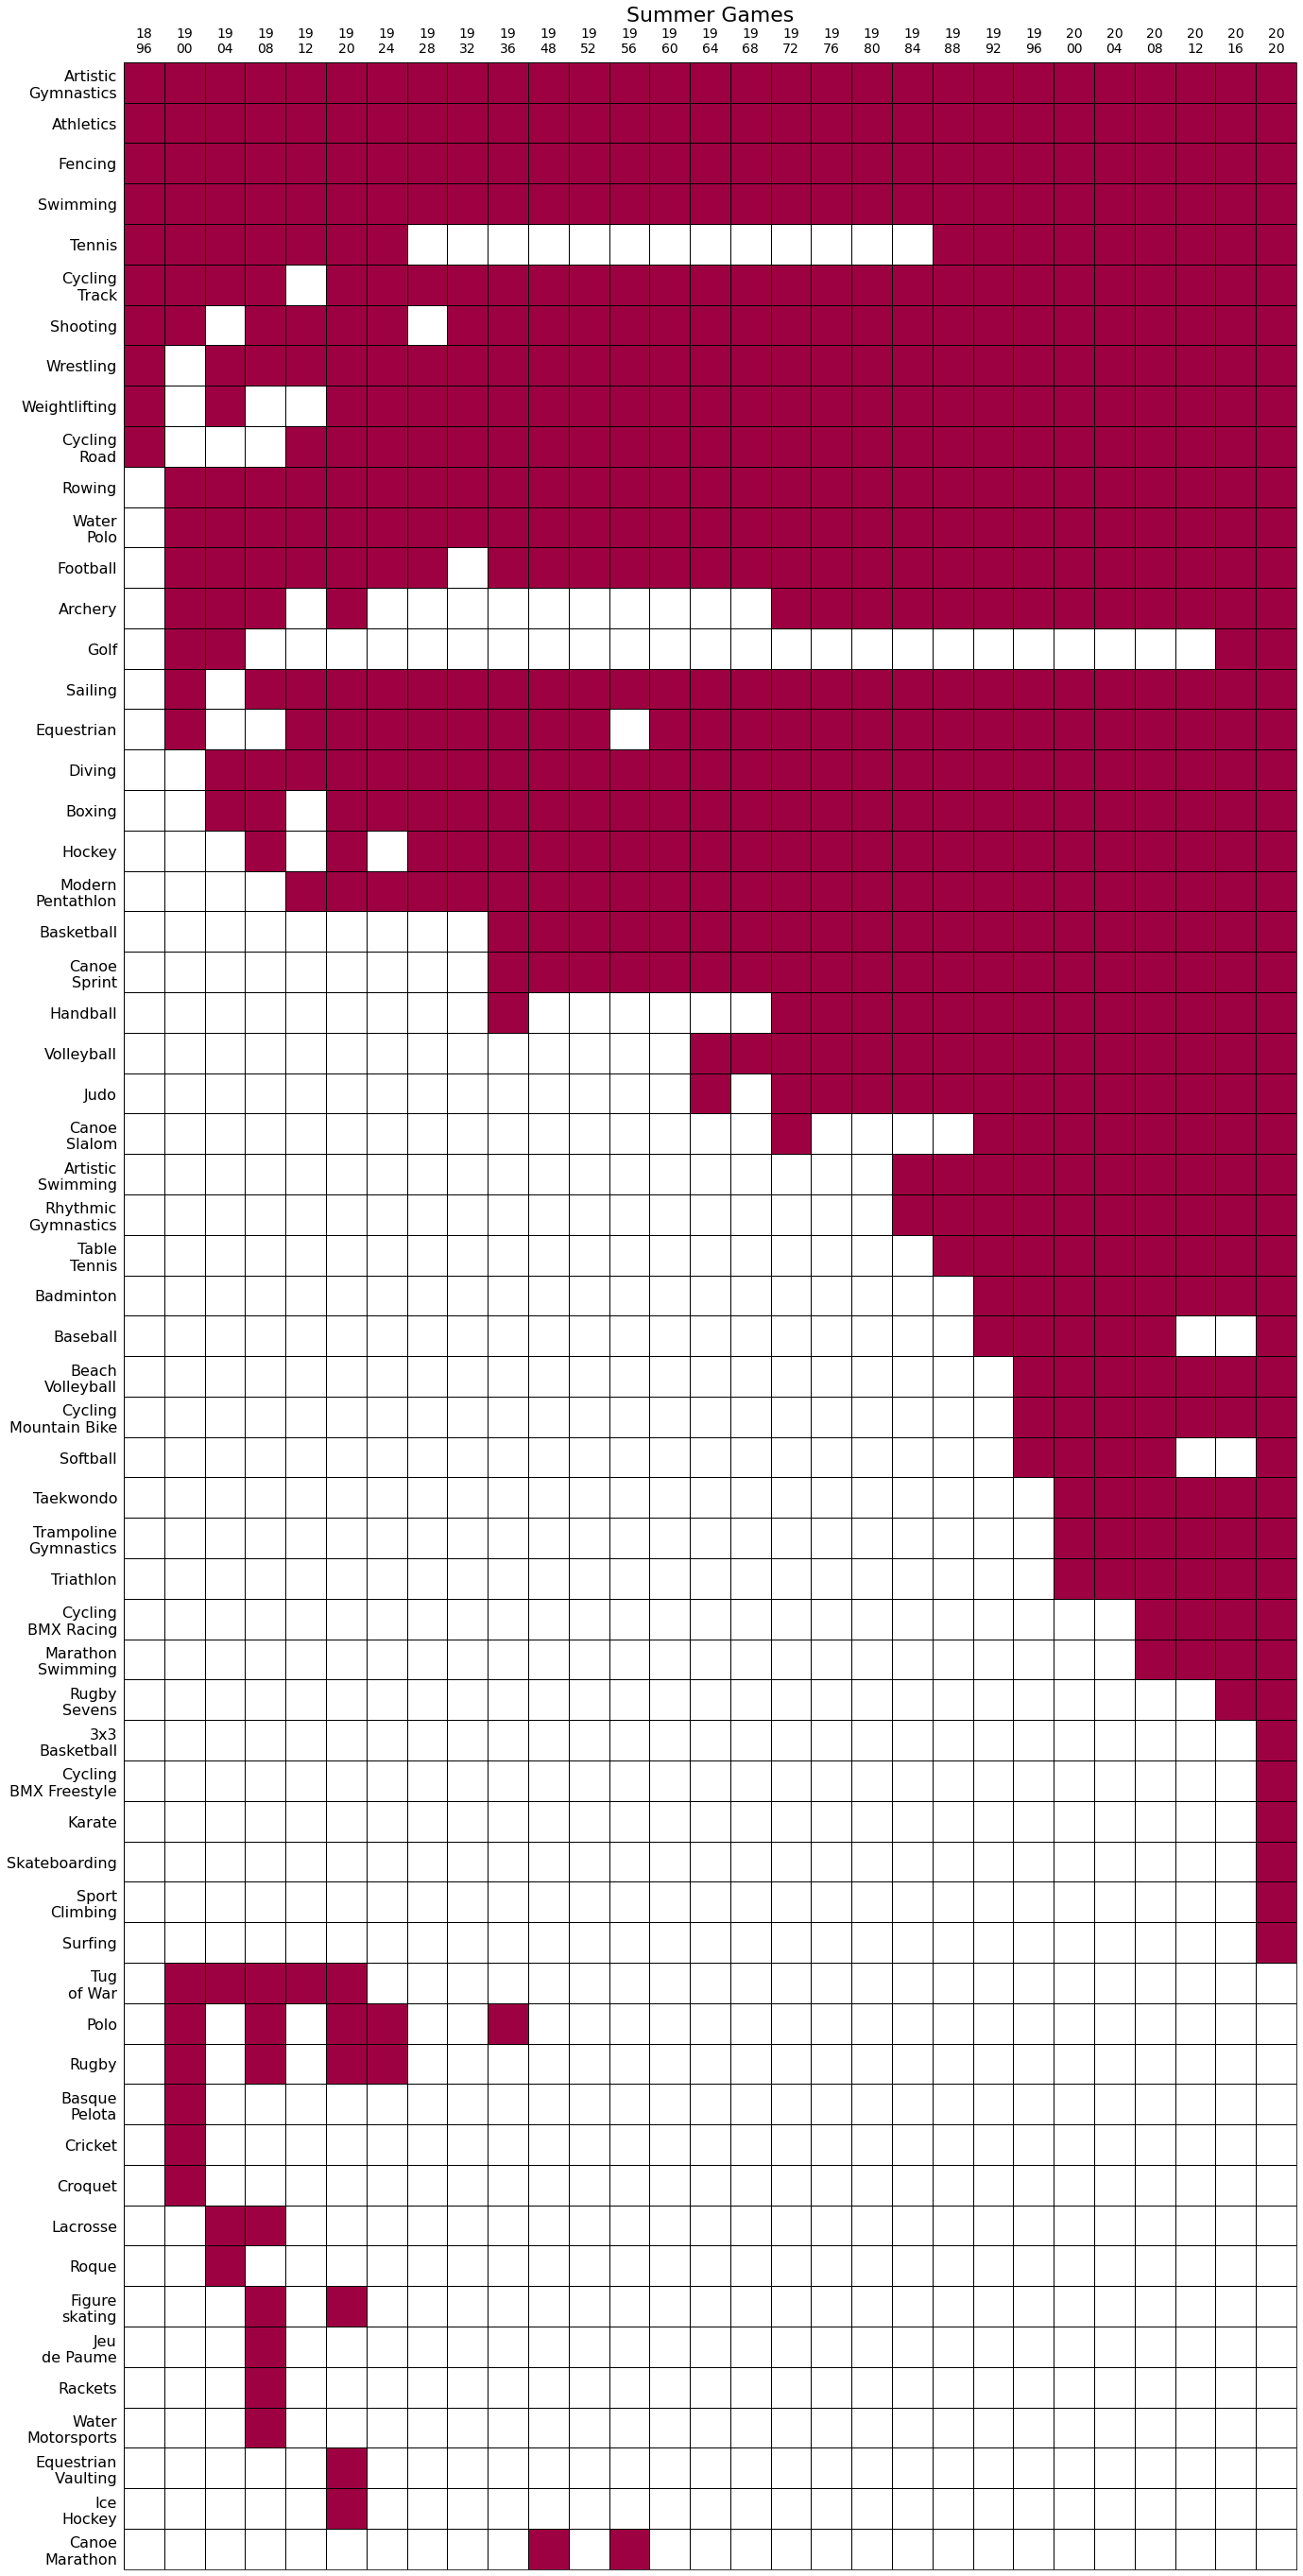

In [23]:
season = 'Summer'
size = (20, 38)
disciplines = get_disciplines_game(data_medal, season)
plot_disciplines(disciplines, title=season, size=size)

## Timeline of disciplines contested at the Winter Summer Olympic Games, 1924-2018

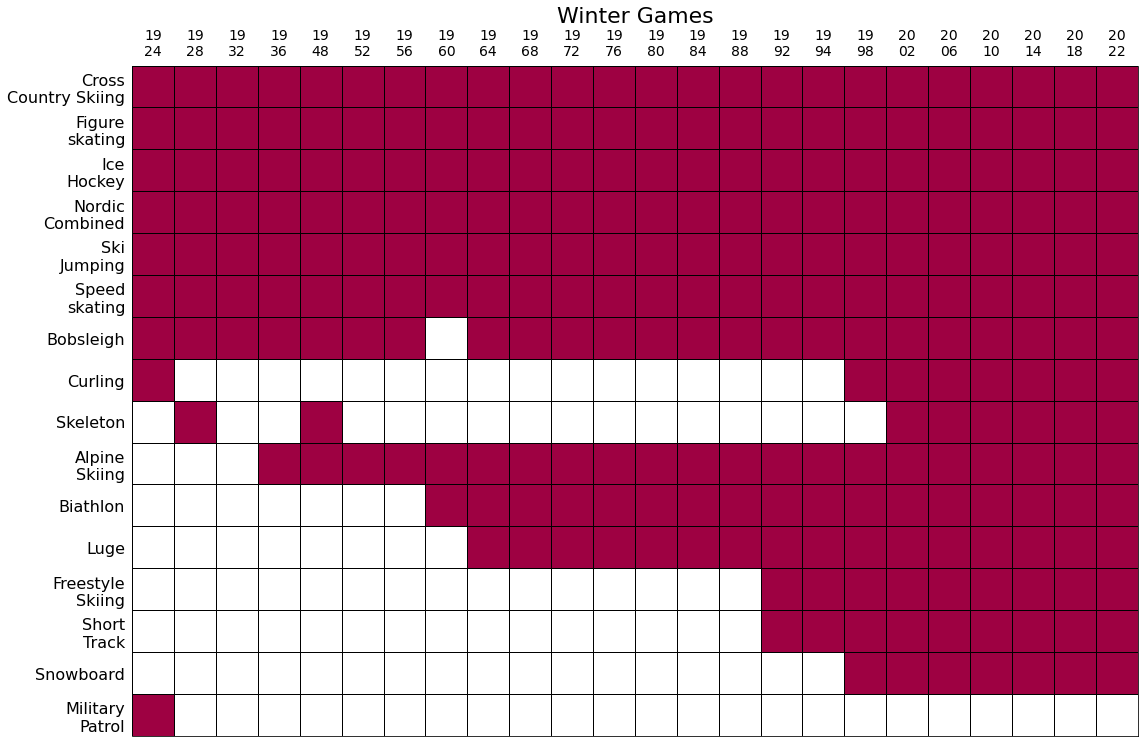

In [24]:
season = 'Winter'
size = (16,12)
disciplines = get_disciplines_game(data_medal, season)
plot_disciplines(disciplines, title=season, size=size)

## Summer Games

In [25]:
data_summer = data_medal[data_medal['game_season']=='Summer'].reset_index(drop=True)
data_summer.drop(['game_season'], axis=1, inplace=True)
data_summer.shape

(16720, 14)

### Medal Distribution by Country

In [26]:
def sort_games_name(game_name_list):
    '''
    Input: ['Sydney 2000', 'Atlanta 1996', 'Beijing 2008', 'Athens 2004']
    Output: ['Atlanta 1996', 'Sydney 2000', 'Athens 2004', 'Beijing 2008'
    '''
    game_name_tuple_split = [(' '.join(i.split(' ')[:-1]), i.split(' ')[-1])  for i in game_name_list]
    game_name_tuple_sorted = sorted(game_name_tuple_split, key=lambda x: x[1])
    game_name_list_sorted = [' '.join(i) for i in game_name_tuple_sorted]
    return game_name_list_sorted

In [27]:
def get_country_medal(data, country):
    data_country = data[data['country_name']==country]
    data_medal = data_country.groupby(['game_name', 'discipline_title'])['participant_type']\
                             .count().reset_index()
    data_medal = data_medal.pivot('discipline_title', 'game_name', 'participant_type')
    data_medal = data_medal[sort_games_name(list(data_medal.columns))]
    if len(list(data_medal.columns))<10:
        data_medal.columns = [col.replace(' ', '\n') for col in data_medal.columns]
    else:
        data_medal.columns = [col.split(' ')[-1] for col in data_medal.columns]
    data_medal['Total'] = data_medal.sum(axis=1)
    data_medal.loc["Total"] = data_medal.sum()
    return data_medal

In [28]:
def plot_country_medal(data, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    ax = sns.heatmap(data, annot=True, annot_kws={"fontsize":16},
                     cbar=False, linewidths=.8, fmt='g', cmap='coolwarm')
#     ax.set_title('Team', size=20)
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=16)
    ax.xaxis.tick_top()
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.tight_layout()
#     plt.savefig('medals.png', dpi=300)
    plt.show()

### Top 10 performers

In [29]:
country_medal = data_summer.groupby(['country_name'])['participant_type'].count()\
                           .reset_index().rename(columns={'participant_type':'total_number'})
country_medal.sort_values('total_number', ascending=False)[:10]

,country_name,total_number
134,USA,2627
46,Germany,1373
118,Soviet Union,1010
48,Great Britain,913
43,France,744
23,China,634
64,Italy,615
5,Australia,547
55,Hungary,509
66,Japan,497


### Medals Heat Map: USA (Top 1 performer)

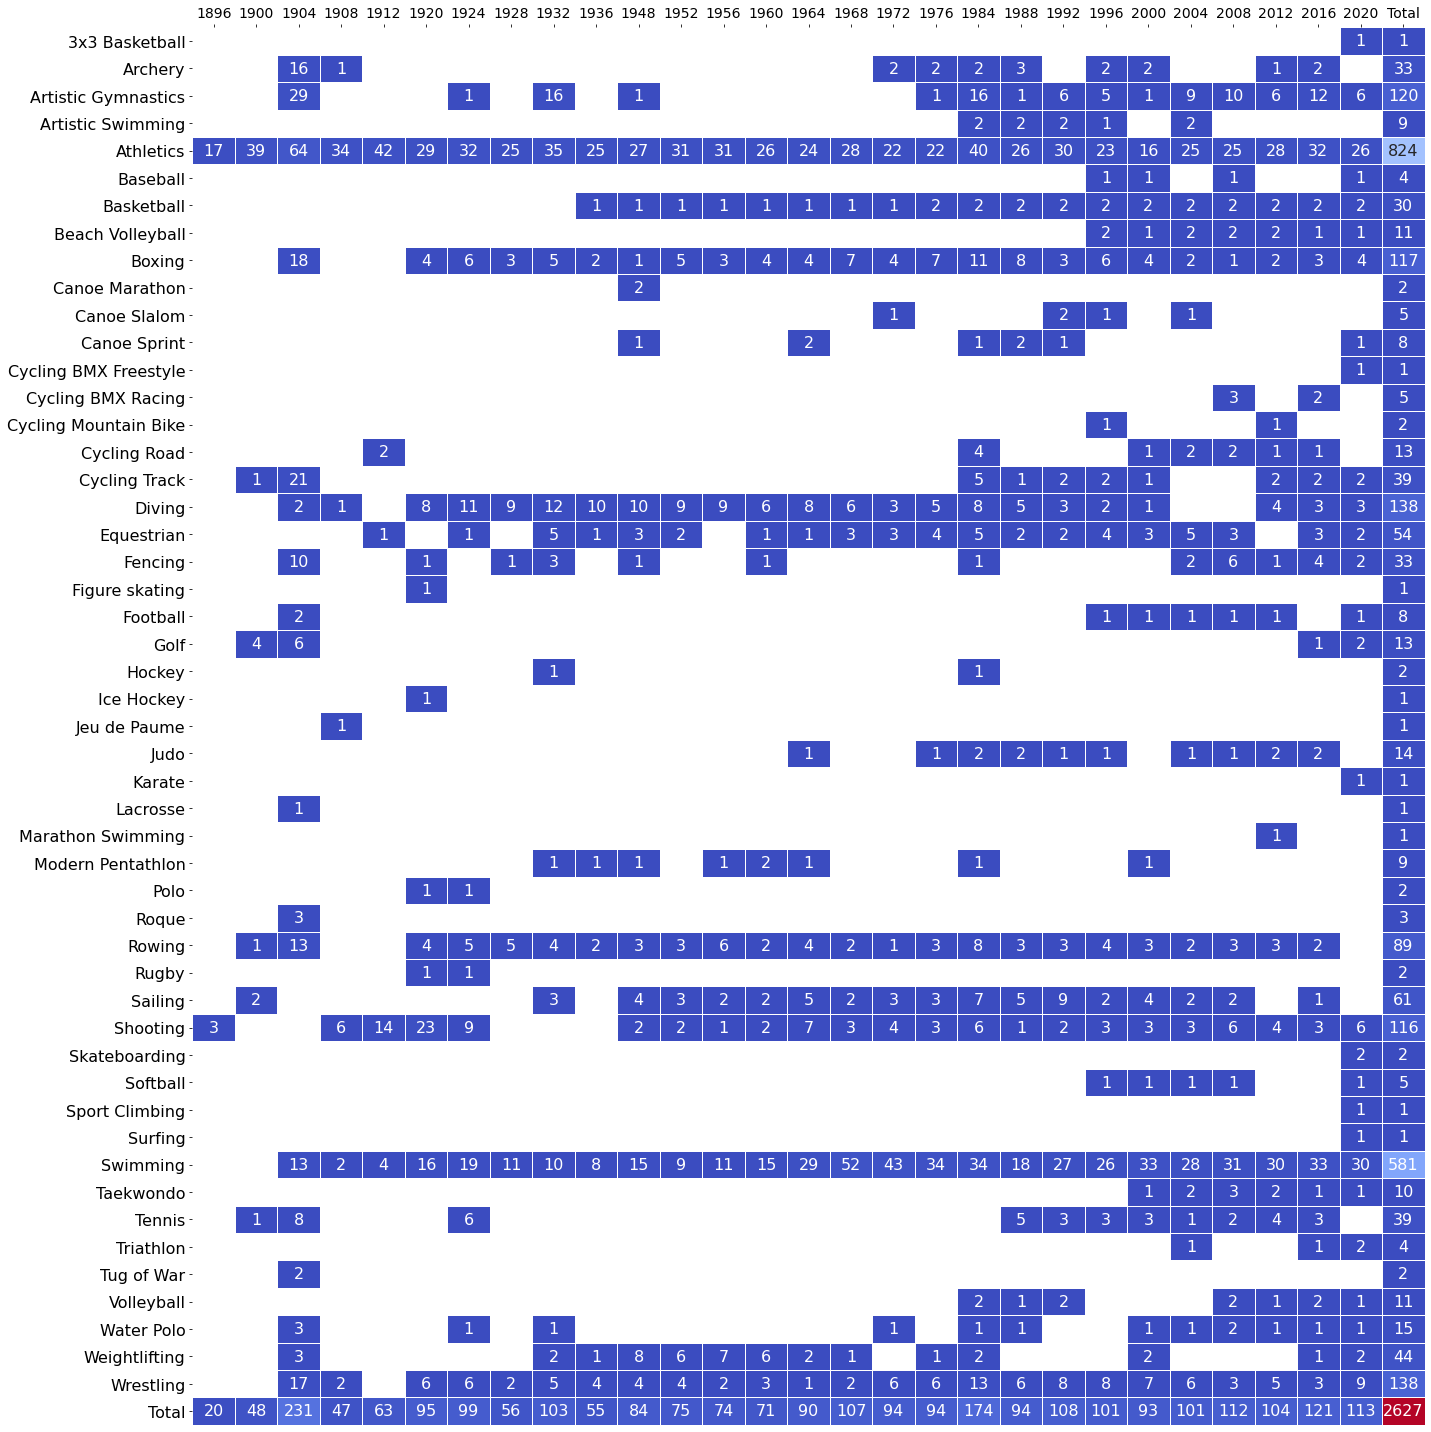

In [30]:
country_medal_usa = get_country_medal(data_summer, 'USA')
plot_country_medal(country_medal_usa)

### Medals Heat Map: Ukraine

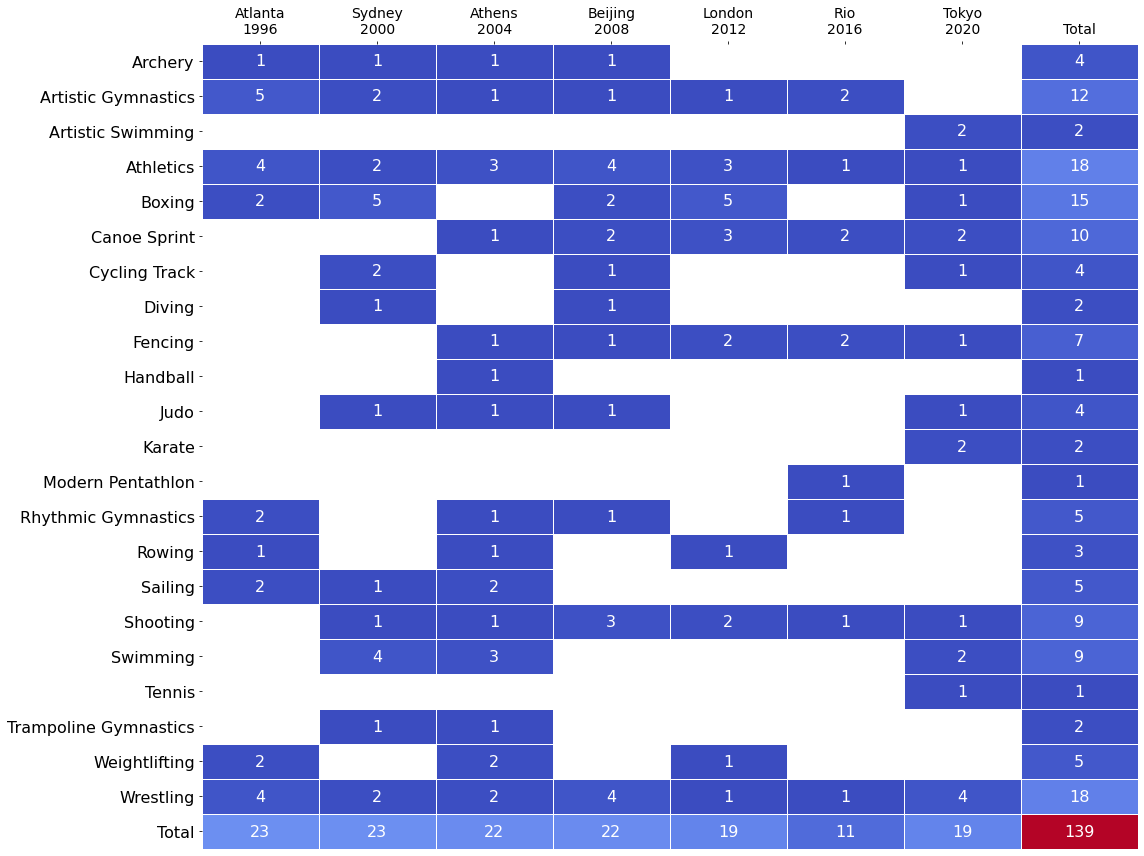

In [31]:
country_medal_ua = get_country_medal(data_summer, 'Ukraine')
plot_country_medal(country_medal_ua, figsize=(16,12))

## Winter Games

In [32]:
data_winter = data_medal[data_medal['game_season']=='Winter'].reset_index(drop=True)
data_winter.drop(['game_season'], axis=1, inplace=True)
data_winter.shape

(3497, 14)

### Top 10 performers

In [33]:
country_medal_winter = data_winter.groupby(['country_name'])['participant_type'].count()\
                           .reset_index().rename(columns={'participant_type':'total_number'})
country_medal_winter.sort_values('total_number', ascending=False)[:10]

,country_name,total_number
14,Germany,435
26,Norway,405
39,USA,330
1,Austria,250
5,Canada,225
35,Soviet Union,194
37,Sweden,176
12,Finland,175
38,Switzerland,167
23,Netherlands,147


### Medals Heat Map: Norway (Top 2 performer)

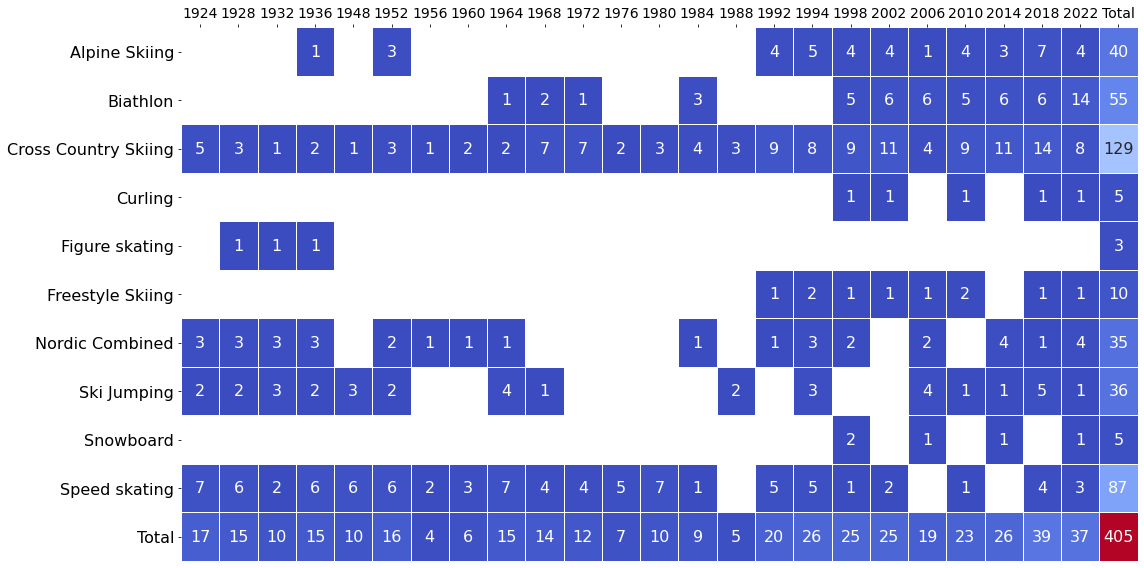

In [34]:
country_medal_nor = get_country_medal(data_winter, 'Norway')
plot_country_medal(country_medal_nor, figsize=(16,8))

## Disciplines: Tennis

In [35]:
data_tennis = data_summer[data_summer['discipline_title']=='Tennis']
data_tennis.shape

(228, 14)

In [36]:
data_tennis_women = data_tennis[(data_tennis['event_gender']=='Women')&
                                (data_tennis['participant_type']=='Athlete')&
                                (data_tennis['game_year']>=1988)]

data_tennis_men = data_tennis[(data_tennis['event_gender']=='Men')&
                              (data_tennis['participant_type']=='Athlete')&
                              (data_tennis['game_year']>=1988)]

In [37]:
data_tennis_women.groupby(['game_name', 'medal_type'])['country_name'].apply(list).reset_index()\
                 .pivot('game_name', 'medal_type', 'country_name')

medal_type,BRONZE,GOLD,SILVER
game_name,,,
Athens 2004,[Australia],[Belgium],[France]
Atlanta 1996,[Czech Republic],[USA],[Spain]
Barcelona 1992,"[Spain, USA]",[USA],[Germany]
Beijing 2008,[Russian Federation],[Russian Federation],[Russian Federation]
London 2012,[Belarus],[USA],[Russian Federation]
Rio 2016,[Czech Republic],[Puerto Rico],[Germany]
Seoul 1988,"[USA, Bulgaria]",[Germany],[Argentina]
Sydney 2000,[USA],[USA],[Russian Federation]
Tokyo 2020,[Ukraine],[Switzerland],[Czech Republic]


In [38]:
data_tennis_men.groupby(['game_name', 'medal_type'])['country_name'].apply(list).reset_index()\
                 .pivot('game_name', 'medal_type', 'country_name')

medal_type,BRONZE,GOLD,SILVER
game_name,,,
Athens 2004,[Chile],[Chile],[USA]
Atlanta 1996,[India],[USA],[Spain]
Barcelona 1992,"[Croatia, Unified Team]",[Switzerland],[Spain]
Beijing 2008,[Serbia],[Spain],[Chile]
London 2012,[Argentina],[Great Britain],[Switzerland]
Rio 2016,[Japan],[Great Britain],[Argentina]
Seoul 1988,"[Sweden, USA]",[Czechoslovakia],[USA]
Sydney 2000,[France],[Russian Federation],[Germany]
Tokyo 2020,[Spain],[Germany],[ROC]


## To be continued ...